In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [15]:
iris = load_iris()

data = iris.data # veriyi aldık
feature_names = iris.feature_names # oznitelik isimlerini aldım
y = iris.target #etiket/sınıflarını aldım

df = pd.DataFrame(data,columns=feature_names)
df["sinif"] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sinif
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
# PCA
from sklearn.decomposition import PCA

pca =PCA(n_components = 2, whiten= True) #whiten = normalize
pca.fit(data)

x_pca = pca.transform(data)

print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ", sum(pca.explained_variance_ratio_))

variance ratio:  [0.92461872 0.05306648]
sum:  0.977685206318795


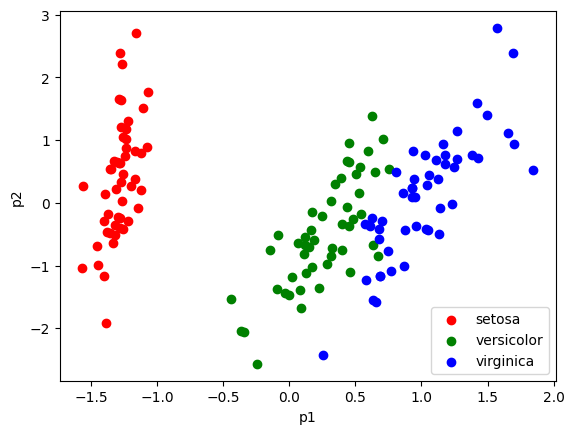

In [17]:
# temel bilesenleri gorsellestirelim

df["p1"] = x_pca[:,0]
df["p2"] = x_pca[:,1]

color = ["red","green","blue"]

for each in range(3):
    plt.scatter(df.p1[df.sinif == each],df.p2[df.sinif == each], color= color[each], label = iris.target_names[each])

plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

In [18]:
# pca ve kernel pca karşılaştırma ornegi
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=0) 

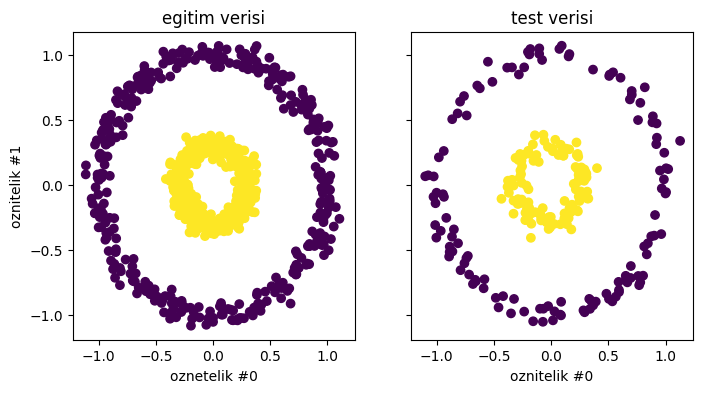

In [19]:
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols = 2, sharex = True, sharey = True, figsize=(8,4))

train_ax.scatter(X_train[:,0],X_train[:,1],c=y_train)
train_ax.set_ylabel("oznitelik #1")
train_ax.set_xlabel("oznetelik #0")
train_ax.set_title("egitim verisi")

test_ax.scatter(X_test[:,0], X_test[:,1], c=y_test)
test_ax.set_xlabel("oznitelik #0")
_ = test_ax.set_title("test verisi")


In [20]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
) 
X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

Text(0.5, 0, 'temel bilesen #0')

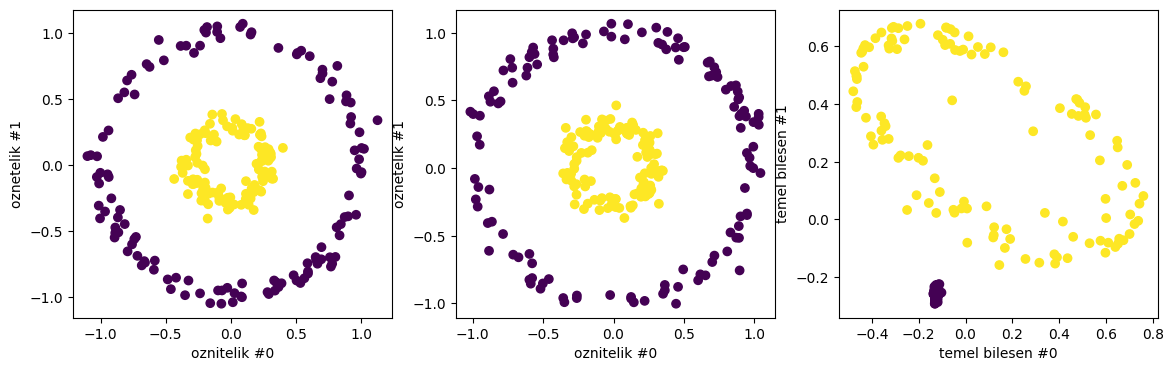

In [21]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14,4)
)

orig_data_ax.scatter(X_test[:,0], X_test[:,1], c=y_test)
orig_data_ax.set_ylabel("oznetelik #1")
orig_data_ax.set_xlabel("oznitelik #0")
#orig_data_ax.title("test verisi")

pca_proj_ax.scatter(X_test_pca[:,0],X_test_pca[:,1], c=y_test)
pca_proj_ax.set_ylabel("oznetelik #1")
pca_proj_ax.set_xlabel("oznitelik #0")
#pca_proj_ax.title("test verisinin\n PCA ile Projeksiyonu")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:,0], X_test_kernel_pca[:,1],c = y_test)
kernel_pca_proj_ax.set_ylabel("temel bilesen #1")
kernel_pca_proj_ax.set_xlabel("temel bilesen #0")
#kernel_pca_proj_ax.set.title("Test verisinin\n kernelPCA ile projeksiyonu")

In [22]:
# reconstruction - geri olusturma
x_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
x_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

Text(0.5, 0, 'oznitelik #0')

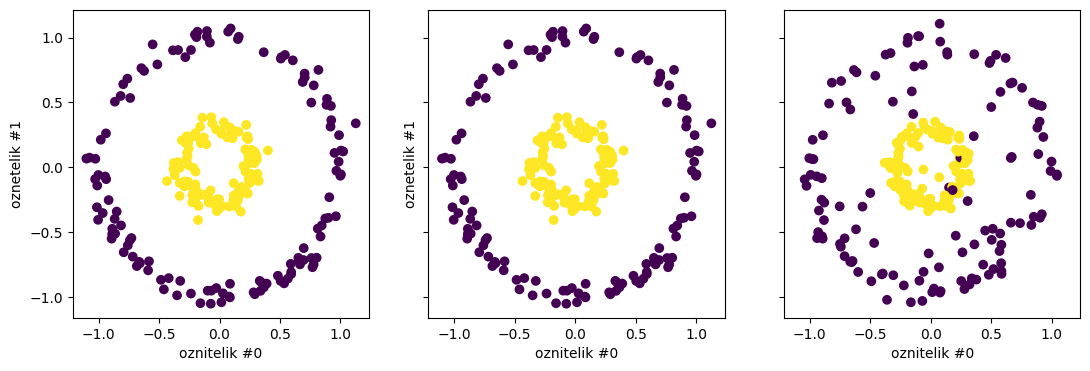

In [26]:
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols=3, sharex=True,sharey=True,figsize=(13,4)
)

orig_data_ax.scatter(X_test[:,0], X_test[:,1], c=y_test)
orig_data_ax.set_ylabel("oznetelik #1")
orig_data_ax.set_xlabel("oznitelik #0")
#orig_data_ax.title("orijinal test verisi")

pca_back_proj_ax.scatter(x_reconstructed_pca[:,0],x_reconstructed_pca[:,1], c=y_test)
pca_back_proj_ax.set_ylabel("oznetelik #1")
pca_back_proj_ax.set_xlabel("oznitelik #0")
#pca_back_proj_ax.title("PCA ile Geri olusturulmus Test Verisi")

kernel_pca_back_proj_ax.scatter(
    x_reconstructed_kernel_pca[:,0], x_reconstructed_kernel_pca[:,1], c= y_test
)

kernel_pca_back_proj_ax.set_xlabel("oznitelik #0")
#_ = kernel_pca_back_proj_ax.set.title("kernelPCA ile geri olusturulmus test veririsi")

